In [1]:
import pyspark as ps
spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("sparkSQL exercise") 
        .getOrCreate()
        )
spark.sql("set spark.sql.caseSensitive=true"); #fixes the error "AnalysisException: Found duplicate column(s) in the data schema: `good for kids`"
sc = spark.sparkContext
from pyspark.sql import SQLContext

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Always make it pretty.
plt.style.use('Solarize_Light2')
font = {'weight': 'regular',
        'size':   16}
plt.rc('font', **font)

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
sc
sqlContext = SQLContext(sc)

In [4]:
#set full df in SQL Context

full_df = sqlContext.read.load('../data/video_game.csv',format='com.databricks.spark.csv',header='true',inferSchema='true')
#full_df.select('Year_of_Release').count()
#full_df.orderBy('Year_of_Release').show(100,truncate=False)

In [5]:
#create a table from df

full_df.createOrReplaceTempView("vg_full_df")

In [6]:
#Gen 5 platform popularity, amount of games on platform BEFORE FFVII

gen_5_platform_pop_pre = spark.sql("SELECT \
                                 Platform,COUNT(Name) as Games_on_Platform, \
                                 ROUND(SUM(NA_players),2) as Total_NA_Players, \
                                 ROUND(SUM(JP_players),2) as Total_JP_Players, \
                                 ROUND(SUM(Other_players),2) as Total_Other_Players, \
                                 ROUND(SUM(Global_players),2) as Total_Global_Players \
                                 FROM vg_full_df \
                                 GROUP BY Platform \
                                 ORDER BY Total_Global_Players DESC")
gen_5_platform_pop_pre.show(100, truncate=False)

+--------+-----------------+----------------+----------------+-------------------+--------------------+
|Platform|Games_on_Platform|Total_NA_Players|Total_JP_Players|Total_Other_Players|Total_Global_Players|
+--------+-----------------+----------------+----------------+-------------------+--------------------+
|PS2     |2161             |583.84          |139.2           |193.44             |1255.64             |
|X360    |1262             |602.47          |12.43           |85.76              |971.63              |
|PS3     |1331             |393.49          |80.19           |135.68             |939.43              |
|Wii     |1320             |496.9           |69.33           |79.07              |908.13              |
|DS      |2152             |382.67          |175.57          |59.28              |807.1               |
|PS      |1197             |336.52          |139.82          |40.91              |730.68              |
|GBA     |822              |187.54          |47.33           |7.

In [7]:
# Gen 5 genre popularity BEFORE FFVII

gen_5_genre_pop_pre = spark.sql("SELECT \
                            Genre, COUNT(Genre) as Games_in_genre_on_Platform, Platform, \
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1993 AND 1997 \
                                AND Platform LIKE 'PS' OR Platform LIKE'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                            GROUP BY Genre, Platform \
                            ORDER BY Platform,Total_Global_Players DESC")
#gen_5_genre_pop_pre.show(100, truncate=False)

In [8]:
#Gen 5 Genre Popularity per Platform BEFORE FFVII

gen_5_genre_pop_plat_pre = spark.sql("SELECT \
                            Genre, Platform, \
                            COUNT(Genre) as Games_in_genre_on_Platform, \
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1993 AND 1997 \
                                AND Platform LIKE 'PS' OR Platform LIKE'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                            GROUP BY Genre,Platform \
                            ORDER BY Platform,Total_Global_Players DESC")
#gen_5_genre_pop_plat_pre.show(100, truncate=False)

In [9]:
#Gen 5 platform popularity, amount of games on platform AFTER FFVII

gen_5_platform_pop_post = spark.sql("SELECT \
                                 Platform,COUNT(Name) as Games_on_Platform, \
                                 ROUND(SUM(NA_players),2) as Total_NA_Players, \
                                 ROUND(SUM(JP_players),2) as Total_JP_Players, \
                                 ROUND(SUM(Other_players),2) as Total_Other_Players, \
                                 ROUND(SUM(Global_players),2) as Total_Global_Players \
                                 FROM vg_full_df \
                                 WHERE Year_of_Release BETWEEN 1997 AND 2006 \
                                     AND Platform LIKE 'PS' OR Platform LIKE'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                                 GROUP BY Platform \
                                 ORDER BY Total_Global_Players DESC")
#gen_5_platform_pop_post.show(100, truncate=False)

In [10]:
# Gen 5 genre popularity AFTER FFVII

gen_5_genre_pop_post = spark.sql("SELECT \
                            Genre, COUNT(Genre) as Games_in_genre_on_Platform, \
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1997 AND 2006 \
                                AND Platform LIKE 'PS' OR Platform LIKE'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                            GROUP BY Genre \
                            ORDER BY Total_Global_Players DESC")
#gen_5_genre_pop_post.show(100, truncate=False)

In [11]:
#Gen 5 Genre Popularity per Platform AFTER FFVII

gen_5_genre_pop_plat_post = spark.sql("SELECT \
                            Genre, Platform, \
                            COUNT(Genre) as Games_in_genre_on_Platform, \
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1997 AND 2006 \
                                AND Platform LIKE 'PS' OR Platform LIKE'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                            GROUP BY Genre,Platform \
                            ORDER BY Platform,Total_Global_Players DESC")
#gen_5_genre_pop_plat_post.show(100, truncate=False)

In [12]:
#Gen 5 platform popularity, amount of games on platform TOTAL

gen_5_platform_pop_tot = spark.sql("SELECT \
                                 Platform,COUNT(Name) as Games_on_Platform, \
                                 ROUND(SUM(NA_players),2) as Total_NA_Players, \
                                 ROUND(SUM(JP_players),2) as Total_JP_Players, \
                                 ROUND(SUM(Other_players),2) as Total_Other_Players, \
                                 ROUND(SUM(Global_players),2) as Total_Global_Players \
                                 FROM vg_full_df \
                                 WHERE Year_of_Release BETWEEN 1993 AND 2006 \
                                     AND Platform LIKE 'PS' OR Platform LIKE'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                                 GROUP BY Platform \
                                 ORDER BY Total_Global_Players DESC")
#gen_5_platform_pop_tot.show(100, truncate=False)

In [13]:
# Gen 5 genre popularity TOTAL

gen_5_genre_pop_tot = spark.sql("SELECT \
                            Genre, COUNT(Genre) as Games_in_genre_on_Platform, \
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1993 AND 2006 \
                                AND Platform LIKE 'PS' OR Platform LIKE'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                            GROUP BY Genre \
                            ORDER BY Total_Global_Players DESC")
#gen_5_genre_pop_tot.show(100, truncate=False)

In [14]:
#Gen 5 Genre Popularity per Platform TOTAL

gen_5_genre_pop_plat_tot = spark.sql("SELECT \
                            Genre, Platform, \
                            COUNT(Genre) as Games_in_genre_on_Platform, \
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1993 AND 2006 \
                                AND Platform LIKE 'PS' OR Platform LIKE'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                            GROUP BY Genre,Platform \
                            ORDER BY Platform,Total_Global_Players DESC")
#gen_5_genre_pop_plat_tot.show(100, truncate=False)

In [15]:
#Gen 5 - Gen 7 RPG Releases Post-FFVII Per Year

gen_5_7_rpg_per_year = spark.sql("SELECT \
                            COUNT(Name), Year_of_Release,\
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1997 AND 2017 \
                                AND Genre LIKE 'Role-Playing'\
                                AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                                    OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                                    OR Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360')\
                            GROUP BY Year_of_Release \
                            ORDER BY Year_of_Release")
#gen_5_7_rpg_per_year.show(100, truncate=False)

In [16]:
#Gen 5 - Gen 7 RPG Releases Post-FFVII Per Platform

gen_5_7_rpg_per_plat = spark.sql("SELECT \
                            COUNT(Name), Platform,\
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1997 AND 2017 \
                                AND Genre LIKE 'Role-Playing'\
                                AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                                    OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                                    OR Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360')\
                            GROUP BY Platform \
                            ORDER BY COUNT(Name) DESC")
#gen_5_7_rpg_per_plat.show(100, truncate=False)

In [17]:
#Gen 5 - Gen 7 Platform Popularity Post-FFVII Per Year

gen_5_7_plat_pop_per_year = spark.sql("SELECT \
                            Platform, Year_of_Release,\
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1997 AND 2017 \
                                AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                                    OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                                    OR Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360')\
                            GROUP BY Platform,Year_of_Release \
                            ORDER BY Year_of_Release,Total_Global_Players DESC")
#gen_5_7_plat_pop_per_year.show(100, truncate=False)

In [18]:
# Top 10 games of gen 4

gen_4_top_10 = spark.sql("SELECT \
                            Name, Genre,Platform,\
                            NA_players,JP_players, Other_players, Global_players\
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1987 AND 2004 \
                                AND Platform LIKE 'SNES' OR Platform LIKE 'GEN' OR Platform LIKE 'SCD' OR Platform LIKE 'NG' OR Platform LIKE 'TG16' \
                            ORDER BY Global_players DESC\
                            LIMIT 10")
#gen_4_top_10.show(truncate=False)

In [19]:
# Top 10 games of gen 5

gen_5_top_10 = spark.sql("SELECT \
                            Name, Genre, Platform,\
                            NA_players,JP_players, Other_players, Global_players\
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1993 AND 2006 \
                                AND Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                            ORDER BY Global_players DESC\
                            LIMIT 10")
#gen_5_top_10.show(truncate=False)

In [20]:
# Top 10 games of gen 6

gen_6_top_10 = spark.sql("SELECT \
                            Name, Genre, Platform\
                            NA_players,JP_players, Other_players, Global_players\
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1998 AND 2013 \
                                AND Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                            ORDER BY Global_players DESC\
                            LIMIT 10")
#gen_6_top_10.show(truncate=False)

In [21]:
# Top 10 games of gen 7

gen_7_top_10 = spark.sql("SELECT \
                            Name, Genre,Platform\
                            NA_players,JP_players, Other_players, Global_players\
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 2005 AND 2017 \
                                AND Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360'\
                            ORDER BY Global_players DESC\
                            LIMIT 10")
#gen_7_top_10.show(truncate=False)

In [22]:
final_fantasies_by_year= spark.sql("SELECT \
                Name, Platform, Year_of_Release, Genre,\
                NA_players,JP_players,Other_players,Global_players \
                FROM vg_full_df \
                WHERE Name LIKE 'Final Fantasy%'\
                AND Year_of_Release < 2018 \
                AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                    OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                    OR Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360')\
                ORDER BY Platform")
#final_fantasies_by_year.show(100, truncate=False)

In [23]:
# ff popularity by year

ff_pop = spark.sql("SELECT \
                    Name, Genre, Platform, Year_of_Release,\
                    NA_players, JP_players, Other_players, Global_players \
                    FROM vg_full_df \
                    WHERE Name LIKE 'Final Fantasy%' \
                        AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                            OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                            OR Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360')\
                    ORDER BY Year_of_Release")
#ff_pop.show(100,truncate=False)

In [24]:
# ff amount of releases by year

ff_amount = spark.sql("SELECT \
                    COUNT(Name), Year_of_Release,\
                    ROUND(SUM(NA_players),2) as Total_NA_Players, \
                    ROUND(SUM(JP_players),2) as Total_JP_Players, \
                    ROUND(SUM(Other_players),2) as Total_Other_Players, \
                    ROUND(SUM(Global_players),2) as Total_Global_Players \
                    FROM vg_full_df \
                    WHERE Name LIKE 'Final Fantasy%' \
                        AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                            OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                            OR Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360')\
                    GROUP BY Year_of_Release \
                    ORDER BY Year_of_Release,COUNT(Name)")
#ff_amount.show(100,truncate=False)

In [25]:
#Gen 6 platform popularity

gen_6_platform_pop = spark.sql("SELECT \
                                 Platform,COUNT(Name) as Games_on_Platform, \
                                 ROUND(SUM(NA_players),2) as Total_NA_Players, \
                                 ROUND(SUM(JP_players),2) as Total_JP_Players, \
                                 ROUND(SUM(Other_players),2) as Total_Other_Players, \
                                 ROUND(SUM(Global_players),2) as Total_Global_Players \
                                 FROM vg_full_df \
                                 WHERE Year_of_Release BETWEEN 1998 AND 2013 \
                                    AND Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                                 GROUP BY Platform \
                                 ORDER BY Total_Global_Players DESC")
#gen_6_platform_pop.show(100, truncate=False)

In [26]:
# Gen 6 genre popularity

gen_6_genre_pop = spark.sql("SELECT \
                            Genre, COUNT(Genre) as Games_in_genre_on_Platform, \
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1998 AND 2013 \
                                AND Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                            GROUP BY Genre \
                            ORDER BY Total_Global_Players DESC")
#gen_6_genre_pop.show(100, truncate=False)

In [27]:
#Gen 6 Genre Popularity per Platform

gen_6_genre_pop_plat = spark.sql("SELECT \
                            Genre, Platform, \
                            COUNT(Genre) as Games_in_genre_on_Platform, \
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1998 AND 2013 \
                                AND Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                            GROUP BY Genre,Platform \
                            ORDER BY Platform,Total_Global_Players DESC")
#gen_6_genre_pop_plat.show(100, truncate=False)

In [28]:
#Gen 7 platform popularity

gen_7_platform_pop = spark.sql("SELECT \
                                 Platform,COUNT(Name) as Games_on_Platform, \
                                 ROUND(SUM(NA_players),2) as Total_NA_Players, \
                                 ROUND(SUM(JP_players),2) as Total_JP_Players, \
                                 ROUND(SUM(Other_players),2) as Total_Other_Players, \
                                 ROUND(SUM(Global_players),2) as Total_Global_Players \
                                 FROM vg_full_df \
                                WHERE Year_of_Release BETWEEN 2005 AND 2017 \
                                    AND Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360'\
                                 GROUP BY Platform \
                                 ORDER BY Total_Global_Players DESC")
#gen_7_platform_pop.show(100, truncate=False)

In [29]:
# Gen 7 genre popularity

gen_7_genre_pop = spark.sql("SELECT \
                            Genre, COUNT(Genre) as Games_in_genre_on_Platform, \
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 2005 AND 2017 \
                                AND Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360'\
                            GROUP BY Genre \
                            ORDER BY Total_Global_Players DESC")
#gen_7_genre_pop.show(100, truncate=False)

In [30]:
#Gen 7 Genre Popularity per Platform

gen_7_genre_pop_plat = spark.sql("SELECT \
                            Genre, Platform, \
                            COUNT(Genre) as Games_in_genre_on_Platform, \
                            ROUND(SUM(NA_players),2) as Total_NA_Players, \
                            ROUND(SUM(JP_players),2) as Total_JP_Players, \
                            ROUND(SUM(Other_players),2) as Total_Other_Players, \
                            ROUND(SUM(Global_players),2) as Total_Global_Players \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 2005 AND 2017 \
                                AND Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360'\
                            GROUP BY Genre,Platform \
                            ORDER BY Platform,Total_Global_Players DESC")
#gen_7_genre_pop_plat.show(100, truncate=False)

In [31]:
# generate dataframes for graphing

In [32]:
#Table to find total sales per year per generation

gen_5_plat_sales_sub = spark.sql("SELECT \
                                    COUNT(Name) AS Sum_Total_Per_Year,Year_of_Release\
                                    FROM vg_full_df\
                                    WHERE Year_of_Release BETWEEN 1993 AND 2006 \
                                        AND Platform LIKE 'PS' OR Platform LIKE'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX'\
                                    GROUP BY Year_of_Release")

gen_5_plat_sales_sub.createOrReplaceTempView("sum_total_games_tab")

#Table to find Total Games Per Platform per Year

gen_5_plat_sales_yr = spark.sql("SELECT \
                                     Platform, COUNT(Name) as Total_Games_On_Platform, Year_of_Release,\
                                     ROUND(SUM(NA_players)/COUNT(Name),2) as NA_Players_Per_Game, \
                                     ROUND(SUM(JP_players)/COUNT(Name),2) as JP_Players_Per_Game, \
                                     ROUND(SUM(Other_players)/COUNT(Name),2) as Other_Players_Per_Game, \
                                     ROUND(SUM(Global_players)/COUNT(Name),2) as Global_Players_Per_Game\
                                     FROM vg_full_df \
                                     WHERE Year_of_Release BETWEEN 1993 AND 2006 \
                                        AND Platform LIKE 'PS' OR vg_full_df.Platform LIKE'SAT' \
                                        OR Platform LIKE 'N64' \
                                        OR Platform LIKE '3DO' \
                                        OR Platform LIKE 'PCFX' \
                                     GROUP BY Platform, Year_of_Release \
                                     ORDER BY Platform, Global_Players_Per_Game DESC")


gen_5_plat_sales_yr.createOrReplaceTempView("gen_5_plat_sales_yr_tab")

#Filter out platforms with less than 10% of total games per year

gen_5_plat_yr_filter = spark.sql("SELECT \
                                     gen_5_plat_sales_yr_tab.Platform, SUM(gen_5_plat_sales_yr_tab.Total_Games_On_Platform) as Total_Games_On_Platform, \
                                     gen_5_plat_sales_yr_tab.Year_of_Release,\
                                     SUM(gen_5_plat_sales_yr_tab.NA_Players_Per_Game) AS NA_Players_Per_Game, \
                                     SUM(gen_5_plat_sales_yr_tab.JP_Players_Per_Game) AS JP_Players_Per_Game, \
                                     SUM(gen_5_plat_sales_yr_tab.Other_Players_Per_Game) AS Other_Players_Per_Game, \
                                     SUM(gen_5_plat_sales_yr_tab.Global_Players_Per_Game) AS Global_Players_Per_Game\
                                     FROM gen_5_plat_sales_yr_tab \
                                            LEFT JOIN \
                                            sum_total_games_tab\
                                            ON gen_5_plat_sales_yr_tab.Year_of_Release = sum_total_games_tab.Year_of_Release \
                                     WHERE gen_5_plat_sales_yr_tab.Year_of_Release BETWEEN 1993 AND 2006 \
                                        AND gen_5_plat_sales_yr_tab.Platform LIKE 'PS' OR \
                                        gen_5_plat_sales_yr_tab.Platform LIKE'SAT' \
                                        OR gen_5_plat_sales_yr_tab.Platform LIKE 'N64' \
                                        OR gen_5_plat_sales_yr_tab.Platform LIKE '3DO' \
                                        OR gen_5_plat_sales_yr_tab.Platform LIKE 'PCFX' \
                                        GROUP BY gen_5_plat_sales_yr_tab.Platform, gen_5_plat_sales_yr_tab.Year_of_Release, sum_total_games_tab.Sum_Total_Per_Year\
                                        HAVING SUM(gen_5_plat_sales_yr_tab.Total_Games_On_Platform) > (0.05 * sum_total_games_tab.Sum_Total_Per_Year)\
                                        ORDER BY gen_5_plat_sales_yr_tab.Platform, gen_5_plat_sales_yr_tab.Year_of_Release")

#gen_5_plat_yr_filter.show()

#convert to pandas
gen_5_plat_yr_pd = gen_5_plat_yr_filter.toPandas()
#remove n/as
gen_5_plat_yr_pd = gen_5_plat_yr_pd.loc[gen_5_plat_yr_pd['Year_of_Release']!='N/A']

In [33]:
def filter_by_col(df,column,filters):
    df_list = []
    for val in filters:
        df_list.append(df.loc[df[column] == val])
    return df_list

In [34]:
def lin_plot_graphs_by_col(axs,df_list,x_col,y_col):
    for df,i in enumerate(df_list):
        ax.plot(df[x_col],df[y_col],lw=4,marker='o')

In [69]:
plt.style.use('seaborn-white')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

plt.rcParams.update({'text.color' : "dimgray",'axes.labelcolor' : "dimgray",'xtick.color':'dimgray','ytick.color':'dimgray'})

In [70]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


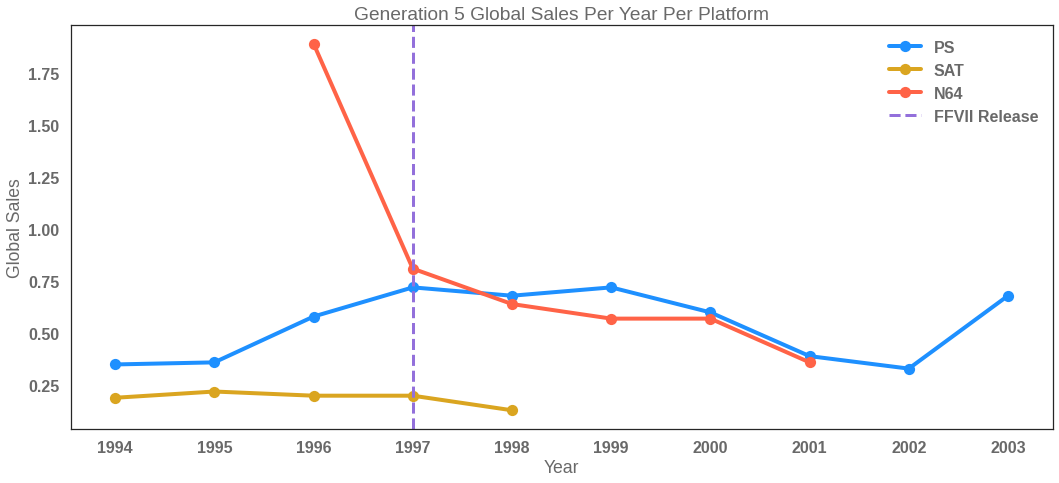

In [71]:
fig, ax = plt.subplots(figsize=(15,7))

x_col = 'Year_of_Release'
y_col = 'Global_Players_Per_Game'
labels = ['PS','SAT','N64','FFVII Release']

ax.plot(gen_5_plat_yr_pd.loc[gen_5_plat_yr_pd['Platform']=='PS'][x_col],gen_5_plat_yr_pd.loc[gen_5_plat_yr_pd['Platform']=='PS'][y_col],lw=4,marker='o',color='dodgerblue')
ax.plot(gen_5_plat_yr_pd.loc[gen_5_plat_yr_pd['Platform']=='SAT'][x_col],gen_5_plat_yr_pd.loc[gen_5_plat_yr_pd['Platform']=='SAT'][y_col],lw=4,marker='o',color='goldenrod')
ax.plot(gen_5_plat_yr_pd.loc[gen_5_plat_yr_pd['Platform']=='N64'][x_col],gen_5_plat_yr_pd.loc[gen_5_plat_yr_pd['Platform']=='N64'][y_col],lw=4,marker='o',color='tomato')

labels = labels.copy()
labels.append('FFVII Release')

    
ax.grid(False)
ax.set_ylabel('Global Sales')
ax.set_xlabel('Year')
ax.set_title('Generation 5 Global Sales Per Year Per Platform')
plt.axvline(x=3,ls='--',lw=3,color='mediumpurple')
plt.legend(labels)

plt.tight_layout()
plt.savefig('../graphs/global_sales_per_year',transparent=True)

In [45]:
#gen_5_genre_sales_per_pd_pre

In [72]:
#Gen 5 Genre Percent of Sales Per Platform, Per Year

'''AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                            OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB'\
                            OR Platform LIKE 'PS3' OR Platform LIKE 'Wii' OR Platform LIKE 'X360')'''

#REMOVE FFVII from dataset

#Find total sales per year of release
plat_genre_sales_sub = spark.sql("SELECT \
                                    COUNT(Name) AS Sum_Total_Per_Year,Year_of_Release,\
                                    SUM(NA_players) AS NA_players_total,\
                                    SUM(JP_players) AS JP_players_total,\
                                    SUM(Other_players) AS Other_players_total,\
                                    SUM(Global_players) AS Global_players_total\
                                    FROM vg_full_df\
                                    WHERE Year_of_Release BETWEEN 1987 AND 2007 \
                                        AND (Name NOT LIKE 'Final Fantasy VII' OR Name NOT LIKE 'Final Fantasy VII %')\
                                        AND (Platform LIKE 'SNES' OR Platform LIKE 'GEN' OR Platform LIKE 'TG16' OR Platform LIKE 'NG'\
                                            OR Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                                            OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB')\
                                    GROUP BY Year_of_Release\
                                    ORDER BY Year_of_Release")

#Transfer to table
plat_genre_sales_sub.createOrReplaceTempView("sum_total_games_genre_tab")

test_a = spark.sql("SELECT * FROM sum_total_games_genre_tab")
#test_a.show()

#Total games per genre, platform, year
genre_plat_sales = spark.sql("SELECT \
                                 Genre, COUNT(Name) as Total_Games_On_Platform, Year_of_Release,\
                                 SUM(NA_players) as NA_Total_Sales, \
                                 SUM(JP_players) as JP_Total_Sales, \
                                 SUM(Other_players) as Other_Total_Sales, \
                                 SUM(Global_players) as Global_Total_Sales \
                                 FROM vg_full_df \
                                 WHERE Year_of_Release BETWEEN 1987 AND 2007 \
                                    AND (Name NOT LIKE 'Final Fantasy VII' OR Name NOT LIKE 'Final Fantasy VII %')\
                                    AND (Platform LIKE 'SNES' OR Platform LIKE 'GEN' OR Platform LIKE 'TG16' OR Platform LIKE 'NG'\
                                        OR Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                                        OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB')\
                                 GROUP BY Genre,Year_of_Release \
                                 ORDER BY Year_of_Release,Genre")


#Transfer to table
genre_plat_sales.createOrReplaceTempView("genre_plat_sales_tab")

test_b = spark.sql("SELECT * FROM genre_plat_sales_tab")
#test_b.show()

#filter total games per genre, year, find sales percentages
genre_sales_per_pre_ffvii = spark.sql("SELECT \
                             SUM(genre_plat_sales_tab.Total_Games_On_Platform) as Total_Games_On_Platform_of_Genre,\
                             \
                             genre_plat_sales_tab.Genre,\
                             ROUND(SUM(genre_plat_sales_tab.NA_Total_Sales)/SUM(sum_total_games_genre_tab.NA_players_total),2) AS NA_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.JP_Total_Sales)/SUM(sum_total_games_genre_tab.JP_players_total),2) AS JP_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.Other_Total_Sales)/SUM(sum_total_games_genre_tab.Other_players_total),2) AS Other_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.Global_Total_Sales)/SUM(sum_total_games_genre_tab.Global_players_total),2) AS Global_Sales_Percent\
                             FROM genre_plat_sales_tab \
                                    LEFT JOIN \
                                    sum_total_games_genre_tab\
                                    ON genre_plat_sales_tab.Year_of_Release = sum_total_games_genre_tab.Year_of_Release \
                             WHERE genre_plat_sales_tab.Year_of_Release BETWEEN 1992 AND 1996\
                             GROUP BY genre_plat_sales_tab.Genre\
                             ORDER BY genre_plat_sales_tab.Genre")



#Turn to pandas dfs
genre_sales_per_pre_ffvii_pd = genre_sales_per_pre_ffvii.toPandas()
#gen_5_genre_sales_per_pre_ffvii_pd


#filter total games per genre, year, find sales percentages
genre_sales_per_post_ffvii = spark.sql("SELECT \
                             SUM(genre_plat_sales_tab.Total_Games_On_Platform) as Total_Games_On_Platform_of_Genre,\
                             \
                             genre_plat_sales_tab.Genre,\
                             ROUND(SUM(genre_plat_sales_tab.NA_Total_Sales)/SUM(sum_total_games_genre_tab.NA_players_total),2) AS NA_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.JP_Total_Sales)/SUM(sum_total_games_genre_tab.JP_players_total),2) AS JP_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.Other_Total_Sales)/SUM(sum_total_games_genre_tab.Other_players_total),2) AS Other_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.Global_Total_Sales)/SUM(sum_total_games_genre_tab.Global_players_total),2) AS Global_Sales_Percent\
                             FROM genre_plat_sales_tab \
                                    LEFT JOIN \
                                    sum_total_games_genre_tab\
                                    ON genre_plat_sales_tab.Year_of_Release = sum_total_games_genre_tab.Year_of_Release \
                             WHERE genre_plat_sales_tab.Year_of_Release BETWEEN 1997 AND 2002\
                             GROUP BY genre_plat_sales_tab.Genre\
                             ORDER BY genre_plat_sales_tab.Genre")



#Turn to pandas dfs
genre_sales_per_post_ffvii_pd = genre_sales_per_post_ffvii.toPandas()

#gen_5_genre_sales_per_pre_ffvii.show()
#gen_5_genre_sales_per_post_ffvii.show()

#split up by platform

#sum(genre_sales_per_post_ffvii_pd['Global_Sales_Percent'])

In [73]:
genre_sales_per_pre_ffvii_pd['Genre']

0           Action
1        Adventure
2         Fighting
3             Misc
4         Platform
5           Puzzle
6           Racing
7     Role-Playing
8          Shooter
9       Simulation
10          Sports
11        Strategy
Name: Genre, dtype: object

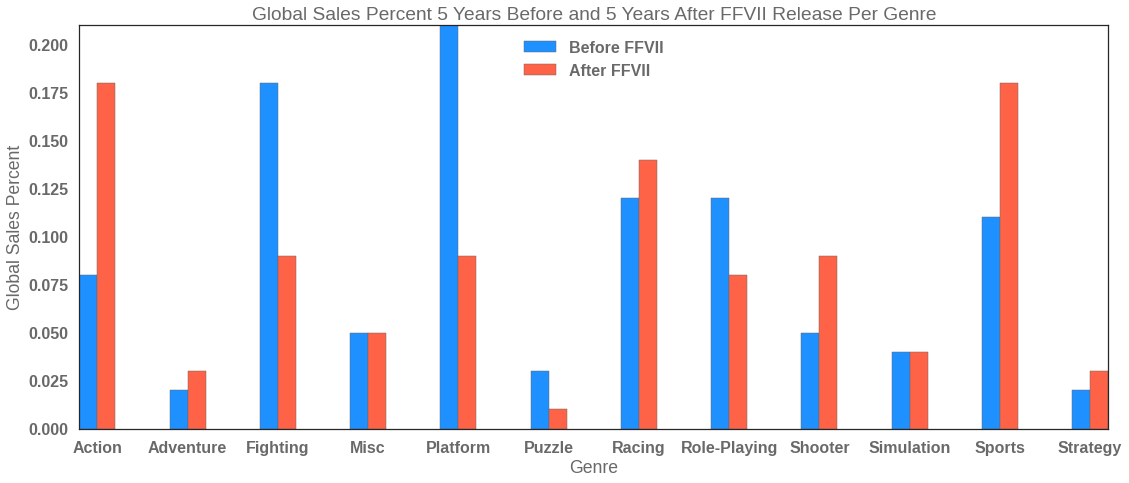

In [74]:
fig, ax = plt.subplots(figsize=(16,7))

genres = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
x_axis = np.arange(len(genre_sales_per_pre_ffvii_pd['Genre']))

y_col_global = 'Global_Sales_Percent'
y_col_na = 'NA_Sales_Percent'
y_col_jp = 'JP_Sales_Percent'
y_col_oth = 'Other_Sales_Percent'

ax.bar(x_axis-0.1,genre_sales_per_pre_ffvii_pd[y_col_global],width=.2,align='center',label='Before FFVII',color='dodgerblue',edgecolor='dimgray')
ax.bar(x_axis+0.1,genre_sales_per_post_ffvii_pd[y_col_global],width=.2,align='center',label='After FFVII',color='tomato',edgecolor='dimgray')

ax.grid(False)
ax.set_ylabel('Global Sales Percent')
ax.set_xlabel('Genre')
ax.set_title('Global Sales Percent 5 Years Before and 5 Years After FFVII Release Per Genre')
plt.xticks(x_axis, genre_sales_per_pre_ffvii_pd['Genre'])
plt.legend()

ax.autoscale(tight=True)
plt.tight_layout()
#plt.show()
plt.savefig('../graphs/global_sales_percent',transparent=True)


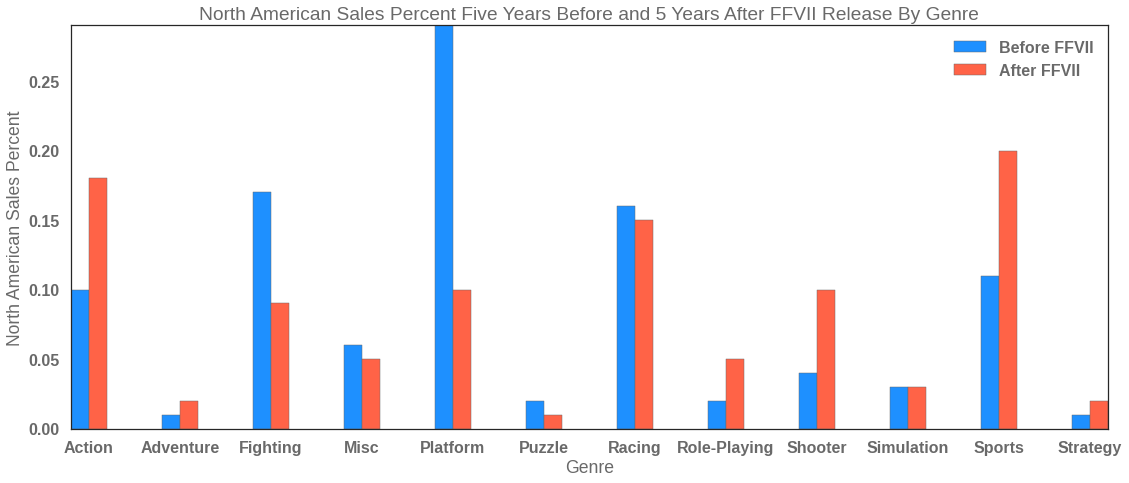

In [75]:
fig, ax = plt.subplots(figsize=(16,7))

genres = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
x_axis = np.arange(len(genre_sales_per_pre_ffvii_pd['Genre']))

y_col_global = 'Global_Sales_Percent'
y_col_na = 'NA_Sales_Percent'
y_col_jp = 'JP_Sales_Percent'
y_col_oth = 'Other_Sales_Percent'

ax.bar(x_axis-0.1,genre_sales_per_pre_ffvii_pd[y_col_na],width=.2,align='center',label='Before FFVII',color='dodgerblue',edgecolor='dimgray')
ax.bar(x_axis+0.1,genre_sales_per_post_ffvii_pd[y_col_na],width=.2,align='center',label='After FFVII',color='tomato',edgecolor='dimgray')

ax.grid(False)
ax.set_ylabel('North American Sales Percent')
ax.set_xlabel('Genre')
ax.set_title('North American Sales Percent Five Years Before and 5 Years After FFVII Release By Genre')
plt.xticks(x_axis, genre_sales_per_pre_ffvii_pd['Genre'])
plt.legend()

ax.autoscale(tight=True)
plt.tight_layout()
#plt.show()
plt.savefig('../graphs/na_sales_percent',transparent=True)

In [76]:
sales_pre = genre_sales_per_pre_ffvii_pd['Global_Sales_Percent']
sales_post = genre_sales_per_post_ffvii_pd['Global_Sales_Percent']

student_t_test = stats.ttest_ind(sales_pre,sales_post,equal_var=True)
student_t_test

Ttest_indResult(statistic=0.0677921841965942, pvalue=0.94656342951479)

In [77]:
# help verbalizing H0: "The release of FFVII increased sales of RPGs, FF Games and Sony Platforms in North America/Globally until the release of the XBox 360"
    #sales of genre, sales of genre per platform, sales on platforms (normalized against amount of games released) over time
    #saturation of rpg and ff titles over time
    #consolidation of consoles across generations
    #amount of games released over time

In [78]:
# How did sales of ffvii change the sales of rpgs in NA and Globally
    #Remove FFVII from data set
        #Otherwise, could be saying FFVII is just really popular
# Look at sales before/after FFVII
    # Percent of Sales (what percent of all sales are from RPGs)
        # Run a Student's T-Test between two dfs
    # Where are the most players playing

In [79]:
#sample is list of games sales of genre before and after 

In [80]:
annual_sales_total = spark.sql("SELECT \
                             Year_of_Release,SUM(NA_players) AS Total_NA_Players,SUM(JP_players) AS Total_JP_Players,SUM(Global_players) AS Total_Global_Players\
                             FROM vg_full_df\
                             WHERE Year_of_Release BETWEEN 1992 AND 2002 \
                                AND (Genre LIKE 'Role-Playing')\
                                AND (Name NOT LIKE 'Final Fantasy VII' OR Name NOT LIKE 'Final Fantasy VII %')\
                                AND (Platform LIKE 'SNES' OR Platform LIKE 'GEN' OR Platform LIKE 'TG16' OR Platform LIKE 'NG'\
                                    OR Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                                    OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB')\
                             GROUP BY Year_of_Release\
                             ORDER BY Year_of_Release")

annual_sales_total.createOrReplaceTempView("annual_sales_total_tab")

In [81]:
#Set up tables showing annual sales per genre for a range of years

rpg_sales_pre = spark.sql("SELECT \
                             Name, Genre, Year_of_Release,NA_players,JP_players,Global_players\
                             FROM vg_full_df\
                             WHERE Year_of_Release BETWEEN 1992 AND 1996 \
                                AND (Genre LIKE 'Role-Playing')\
                                AND (Name NOT LIKE 'Final Fantasy VII' OR Name NOT LIKE 'Final Fantasy VII %')\
                                AND (Platform LIKE 'SNES' OR Platform LIKE 'GEN' OR Platform LIKE 'TG16' OR Platform LIKE 'NG'\
                                    OR Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                                    OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB')\
                             ORDER BY Year_of_Release")

rpg_sales_pre.createOrReplaceTempView("rpg_sales_pre_tab")

rpg_sales_post = spark.sql("SELECT \
                             Name, Genre, Year_of_Release,NA_players,JP_players,Global_players\
                             FROM vg_full_df\
                             WHERE Year_of_Release BETWEEN 1997 AND 2002 \
                                AND (Genre LIKE 'Role-Playing')\
                                AND (Name NOT LIKE 'Final Fantasy VII' OR Name NOT LIKE 'Final Fantasy VII %')\
                                AND (Platform LIKE 'SNES' OR Platform LIKE 'GEN' OR Platform LIKE 'TG16' OR Platform LIKE 'NG'\
                                    OR Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX' \
                                    OR Platform LIKE 'PS2' OR Platform LIKE 'DC' OR Platform LIKE 'GC' OR Platform LIKE 'XB')\
                             ORDER BY Year_of_Release")

rpg_sales_post.createOrReplaceTempView("rpg_sales_post_tab")


In [82]:
#normalizing annual sales for rpgs by dividing by total annual sales, scaling up by 1000

rpg_sales_pre_norm = spark.sql("SELECT\
                    rpg_sales_pre_tab.Name,rpg_sales_pre_tab.Genre,rpg_sales_pre_tab.Year_of_Release,\
                    ROUND(rpg_sales_pre_tab.NA_players/annual_sales_total_tab.Total_NA_Players*1000,2) AS NA_Sales_Scaled,\
                    ROUND(rpg_sales_pre_tab.JP_players/annual_sales_total_tab.Total_JP_Players*1000,2) AS JP_Sales_Scaled,\
                    ROUND(rpg_sales_pre_tab.Global_players/annual_sales_total_tab.Total_Global_Players*1000,2) AS Global_Sales_Scaled\
                    FROM rpg_sales_pre_tab\
                        LEFT JOIN annual_sales_total_tab\
                            ON rpg_sales_pre_tab.Year_of_Release = annual_sales_total_tab.Year_of_Release\
                    ORDER BY rpg_sales_pre_tab.Year_of_Release")
                               
rpg_sales_pre_norm_pd=rpg_sales_pre_norm.toPandas()
rpg_sales_pre_norm_pd=rpg_sales_pre_norm_pd.dropna()
rpg_sales_pre_norm_pd

,Name,Genre,Year_of_Release,NA_Sales_Scaled,JP_Sales_Scaled,Global_Sales_Scaled
5,Secret of Mana,Role-Playing,1993,1000.00,283.81,327.37
6,Romancing SaGa 2,Role-Playing,1993,0.00,222.86,209.30
7,Dragon Quest I & II,Role-Playing,1993,0.00,219.05,205.72
8,Torneko no Daibouken: Fushigi no Dungeon,Role-Playing,1993,0.00,148.57,139.53
9,Shin Momotarou Densetsu,Role-Playing,1993,0.00,60.95,57.25
...,...,...,...,...,...,...
73,Sword & Sorcery,Role-Playing,1996,0.00,12.06,9.32
74,Tecmo's Deception,Role-Playing,1996,26.67,0.00,6.52
75,Dark Half,Role-Playing,1996,0.00,4.83,3.73
76,Blue Breaker: Ken Yorimo Hohoemi o,Role-Playing,1996,0.00,3.62,2.80


In [83]:
rpg_sales_post_norm = spark.sql("SELECT\
                    rpg_sales_post_tab.Name,rpg_sales_post_tab.Genre,rpg_sales_post_tab.Year_of_Release,\
                    ROUND(rpg_sales_post_tab.NA_players/annual_sales_total_tab.Total_NA_Players*1000,2) AS NA_Sales_Scaled,\
                    ROUND(rpg_sales_post_tab.JP_players/annual_sales_total_tab.Total_JP_Players*1000,2) AS JP_Sales_Scaled,\
                    ROUND(rpg_sales_post_tab.Global_players/annual_sales_total_tab.Total_Global_Players*1000,2) AS Global_Sales_Scaled\
                    FROM rpg_sales_post_tab\
                        LEFT JOIN annual_sales_total_tab\
                            ON rpg_sales_post_tab.Year_of_Release = annual_sales_total_tab.Year_of_Release\
                    ORDER BY rpg_sales_post_tab.Year_of_Release")
                               
rpg_sales_post_norm_pd=rpg_sales_post_norm.toPandas()
rpg_sales_post_norm_pd=rpg_sales_post_norm_pd.dropna()
rpg_sales_post_norm_pd

,Name,Genre,Year_of_Release,NA_Sales_Scaled,JP_Sales_Scaled,Global_Sales_Scaled
0,Final Fantasy VII,Role-Playing,1997,566.85,293.91,454.42
1,Final Fantasy Tactics,Role-Playing,1997,175.14,120.07,114.54
2,SaGa Frontier,Role-Playing,1997,28.25,95.88,63.11
3,Chocobo no Fushigi Dungeon,Role-Playing,1997,0.00,102.15,57.04
4,Tales of Destiny,Role-Playing,1997,16.95,74.37,48.62
...,...,...,...,...,...,...
144,Dual Hearts,Role-Playing,2002,3.22,0.00,2.43
145,Next Generation of Chaos,Role-Playing,2002,0.00,8.13,2.43
146,Shin Megami Tensei NINE,Role-Playing,2002,0.00,8.13,2.43
147,Metal Dungeon,Role-Playing,2002,2.15,0.00,1.46


In [84]:
samps_global_pre = rpg_sales_pre_norm_pd['Global_Sales_Scaled']
samps_global_post = rpg_sales_post_norm_pd['Global_Sales_Scaled']

global_sales_rpg_t_test = stats.ttest_ind(samps_global_pre,samps_global_post,equal_var=True)
tstat,pval = global_sales_rpg_t_test
print(f'T-statistic: {tstat}, P-value: {pval}')

T-statistic: 1.3109964992433512, P-value: 0.19122570645797235


In [85]:
#samps_global_pre.hist(bins=20)

In [86]:
#samps_global_pre.hist(bins=20)

In [87]:
samps_na_pre = rpg_sales_pre_norm_pd['NA_Sales_Scaled']
samps_na_post = rpg_sales_post_norm_pd['NA_Sales_Scaled']

na_sales_rpg_t_test = stats.ttest_ind(samps_na_pre,samps_na_post,equal_var=True)
tstat,pval = na_sales_rpg_t_test
print(f'T-statistic: {tstat}, P-value: {pval}')

T-statistic: 0.8058162606799943, P-value: 0.42121892755009016


In [88]:
#samps_na_pre.hist(bins=20)

In [89]:
#fail to reject in both instances, null hypothesis: release of FFVII did not effect sales of RPG games globally or in NA

In [90]:
#samps_na_post.hist(bins=20)

In [91]:
annual_sales_total_pd = annual_sales_total.toPandas()
#annual_sales_total_pd

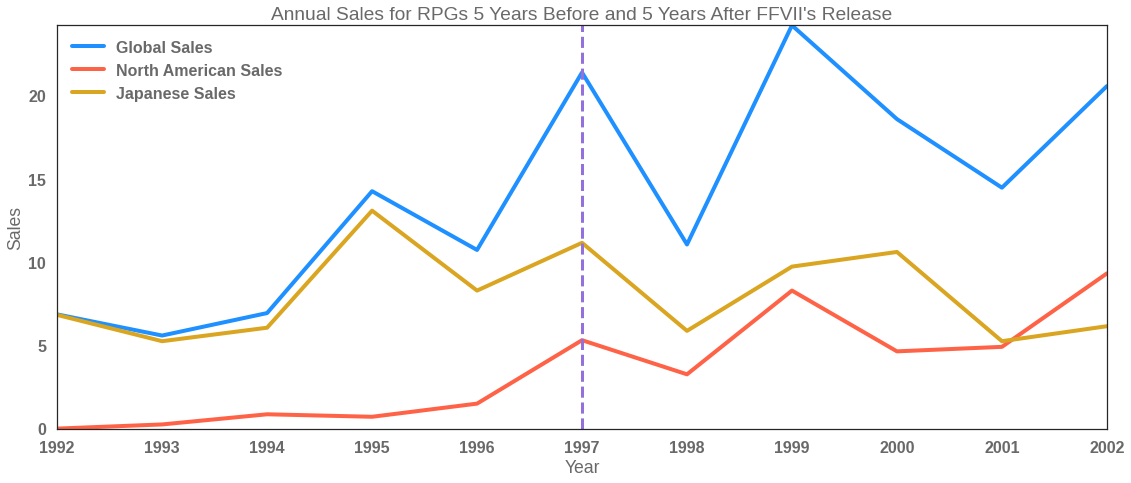

In [92]:
fig, ax = plt.subplots(figsize=(16,7))

x_axis = annual_sales_total_pd['Year_of_Release']

y_axis_global = annual_sales_total_pd['Total_Global_Players']
y_axis_na = annual_sales_total_pd['Total_NA_Players']
y_axis_jp = annual_sales_total_pd['Total_JP_Players']

ax.plot(x_axis,y_axis_global,label='Global Sales',lw=4,color='dodgerblue')
ax.plot(x_axis,y_axis_na,label='North American Sales',lw=4,color='tomato')
ax.plot(x_axis,y_axis_jp,label='Japanese Sales',lw=4,color='goldenrod')

ax.grid(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Year')
ax.set_title("Annual Sales for RPGs 5 Years Before and 5 Years After FFVII's Release")
plt.axvline(x=5,ls='--',lw=3,color='mediumpurple')
plt.legend()

ax.autoscale(tight=True)
plt.tight_layout()
#plt.show()
plt.savefig('../graphs/all_rpg_sales_per_year_line',transparent=True)

In [108]:
example_df = spark.sql("SELECT Name,Platform,Year_of_Release,Genre,NA_players,JP_players,Global_players \
                        FROM vg_full_df \
                        WHERE Year_of_Release > 1996 \
                        AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX')\
                        ORDER BY Year_of_Release,Genre \
                        LIMIT 10")
example_df.show(truncate=False)
#print(example_df.toPandas().to_html())

+--------------------------------+--------+---------------+------+----------+----------+--------------+
|Name                            |Platform|Year_of_Release|Genre |NA_players|JP_players|Global_players|
+--------------------------------+--------+---------------+------+----------+----------+--------------+
|The Lost World: Jurassic Park   |PS      |1997           |Action|0.57      |0.0       |1.02          |
|Dynasty Warriors                |PS      |1997           |Action|0.09      |0.11      |0.27          |
|Rampage World Tour              |PS      |1997           |Action|0.47      |0.0       |0.85          |
|Frogger                         |PS      |1997           |Action|3.79      |0.0       |4.16          |
|Blast Corps                     |N64     |1997           |Action|0.39      |0.17      |0.71          |
|Mystical Ninja starring Goemon  |N64     |1997           |Action|0.07      |0.23      |0.36          |
|Star Wars: Masters of Teras Kasi|PS      |1997           |Actio

In [94]:
rpgs_per_year = spark.sql("SELECT COUNT(Name) AS total_annual_releases,Year_of_Release \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1994 AND 2002 \
                                AND (Genre LIKE 'Role-Playing')\
                            GROUP BY Year_of_Release\
                            ORDER BY Year_of_Release")
rpgs_per_year_pd = rpgs_per_year.toPandas()
rpgs_per_year_pd = rpgs_per_year_pd.loc[rpgs_per_year_pd['Year_of_Release']!= 'N/A']
rpgs_per_year_pd

,total_annual_releases,Year_of_Release
0,17,1994
1,24,1995
2,28,1996
3,23,1997
4,26,1998
5,33,1999
6,29,2000
7,41,2001
8,55,2002


In [95]:
ps_games_per_year = spark.sql("SELECT COUNT(Name) AS total_annual_releases,Year_of_Release \
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1994 AND 2002\
                                AND (Platform LIKE 'PS' OR Platform LIKE 'PS%') \
                            GROUP BY Year_of_Release\
                            ORDER BY Year_of_Release")

ps_games_per_year_pd = ps_games_per_year.toPandas()
ps_games_per_year_pd = ps_games_per_year_pd.loc[ps_games_per_year_pd['Year_of_Release']!= 'N/A']

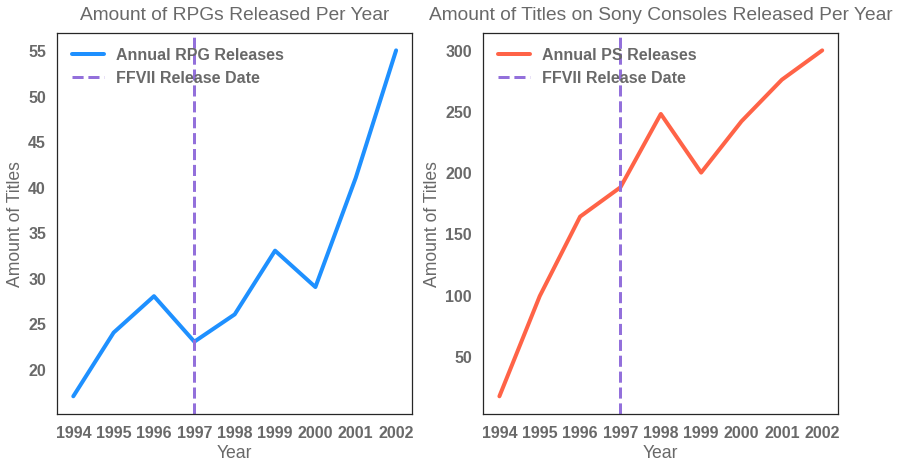

In [96]:
fig, ax = plt.subplots(1,2,figsize=(14,7))

plt.rcParams['axes.titley'] = 1.02

ax[0].plot(rpgs_per_year_pd['Year_of_Release'],rpgs_per_year_pd['total_annual_releases'],lw=4,color='dodgerblue')
ax[1].plot(ps_games_per_year_pd['Year_of_Release'],ps_games_per_year_pd['total_annual_releases'],lw=4,color='tomato')

ax[0].grid(False)
ax[0].set_ylabel('Amount of Titles')
ax[0].set_xlabel('Year')
ax[0].set_title("Amount of RPGs Released Per Year")
ax[0].axvline(x=3,ls='--',lw=3,color='mediumpurple')
ax[0].legend(['Annual RPG Releases','FFVII Release Date'])

ax[1].grid(False)
ax[1].set_ylabel('Amount of Titles')
ax[1].set_xlabel('Year')
ax[1].set_title("Amount of Titles on Sony Consoles Released Per Year")
ax[1].axvline(x=3,ls='--',lw=3,color='mediumpurple')
ax[1].legend(['Annual PS Releases','FFVII Release Date'])

#plt.show()
plt.savefig('../graphs/rpg_sales_per_year',transparent=True,bbox_inches='tight')

In [120]:
games_1997_total = spark.sql("SELECT SUM(NA_players) AS total_na_sales, Year_of_Release \
                            FROM vg_full_df \
                            GROUP BY Year_of_Release")

games_1997_total.createOrReplaceTempView("games_1997_total_tab")

games_in_range_1997 = spark.sql("SELECT Name, NA_players,Year_of_Release \
                            FROM vg_full_df")

games_in_range_1997.createOrReplaceTempView("games_in_range_1997_tab")

games_in_range_1997_percent = spark.sql("SELECT games_in_range_1997_tab.Name, ROUND(games_in_range_1997_tab.NA_players/games_1997_total_tab.total_na_sales,2)*100 AS NA_Sales_Percent \
                            FROM games_in_range_1997_tab LEFT JOIN\
                            games_1997_total_tab\
                            ON games_in_range_1997_tab.Year_of_Release = games_1997_total_tab.Year_of_Release\
                            WHERE games_in_range_1997_tab.Year_of_Release LIKE 1997\
                            ORDER BY games_in_range_1997_tab.Year_of_Release,games_in_range_1997_tab.NA_players  DESC LIMIT 10")

games_in_range_1997_percent_pd = games_in_range_1997_percent.toPandas()
games_in_range_1997_count = games_in_range_1997_percent_pd['Name'].count()
games_in_range_1997_percent_pd

,Name,NA_Sales_Percent
0,GoldenEye 007,6.0
1,Half-Life,4.0
2,Gran Turismo,4.0
3,Frogger,4.0
4,Crash Bandicoot 2: Cortex Strikes Back,4.0
5,Final Fantasy VII,3.0
6,Diddy Kong Racing,3.0
7,Star Fox 64,3.0
8,Tomb Raider II,2.0
9,Theme Hospital,2.0


In [121]:
games_1997_titles = spark.sql("SELECT SUM(NA_players) AS total_na_sales, COUNT(Year_of_Release) as Years\
                            FROM vg_full_df \
                            WHERE Year_of_Release BETWEEN 1997 AND 2002\
                            AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX')")

games_1997_titles.createOrReplaceTempView("games_1997_titles_tab")

platforms_1997_totals = spark.sql("SELECT SUM(NA_players) AS NA_players_total,Platform,COUNT(Year_of_Release) as Years\
                                    FROM vg_full_df \
                                    WHERE Year_of_Release BETWEEN 1997 AND 2002\
                                    AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX') \
                                    GROUP BY Platform\
                                    ORDER BY NA_players_total DESC\
                                    LIMIT 2")

platforms_1997_totals.createOrReplaceTempView("platforms_1997_totals_tab")


games_1997_titles_pd = games_1997_titles.toPandas()
platforms_1997_totals_pd = platforms_1997_totals.toPandas()


games_1997_titles.show()

total_arr = np.array([games_1997_titles_pd['total_na_sales'],games_1997_titles_pd['total_na_sales']])
total_df = pd.DataFrame(total_arr.flatten())
platforms_1997_totals_pd['NA_Percent'] = (platforms_1997_totals_pd['NA_players_total']/total_df[0])*100
platforms_1997_totals_pd['NA_Percent']

+-----------------+-----+
|   total_na_sales|Years|
+-----------------+-----+
|389.6599999999985| 1269|
+-----------------+-----+



0    69.747985
1    30.252015
Name: NA_Percent, dtype: float64

In [124]:
titles = np.array(games_in_range_1997_percent_pd['NA_Sales_Percent'])
x_axis = np.arange(len(titles))
y_axis = games_in_range_1997_percent_pd['NA_Sales_Percent']
y_axis

0    6.0
1    4.0
2    4.0
3    4.0
4    4.0
5    3.0
6    3.0
7    3.0
8    2.0
9    2.0
Name: NA_Sales_Percent, dtype: float64

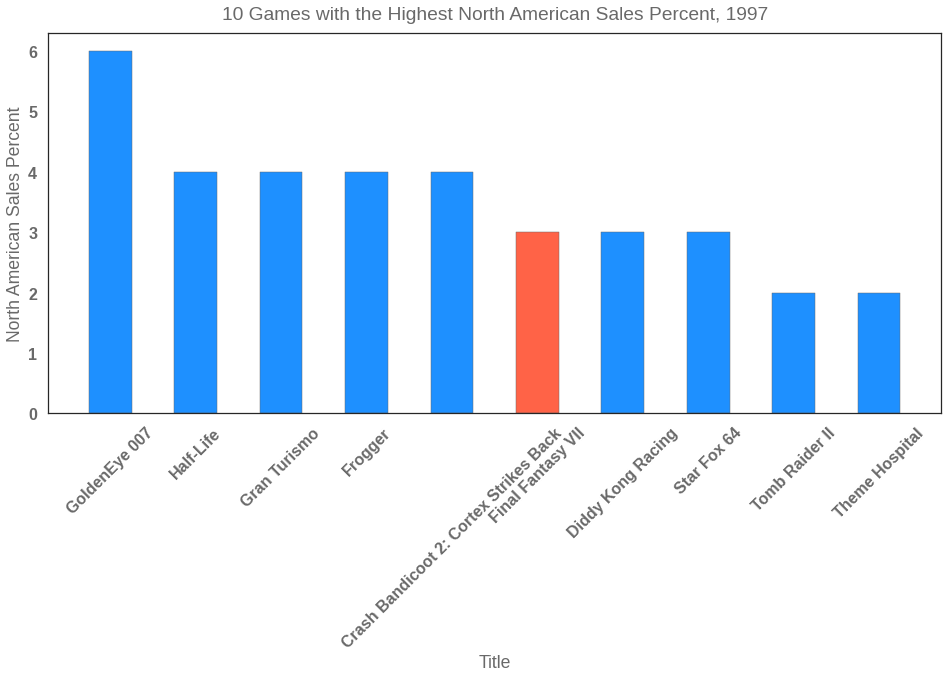

In [125]:
fig, ax = plt.subplots(figsize=(16,7))

colors = ['dodgerblue','dodgerblue','dodgerblue','dodgerblue','dodgerblue','tomato','dodgerblue','dodgerblue','dodgerblue','dodgerblue']

ax.bar(games_in_range_1997_percent_pd['Name'],y_axis,width=.5,color=colors,edgecolor='dimgray')

ax.grid(False)
ax.set_ylabel('North American Sales Percent')
ax.set_xlabel('Title')
ax.set_title('10 Games with the Highest North American Sales Percent, 1997')
plt.xticks(rotation='45')
#plt.tight_layout()
#plt.show()
plt.savefig('../graphs/ffvii_rpg_sales',transparent=True,bbox_inches='tight')

In [127]:
platforms = np.array(platforms_1997_totals_pd['Platform'])
x_axis = np.arange(len(platforms))
y_axis = platforms_1997_totals_pd['NA_Percent']

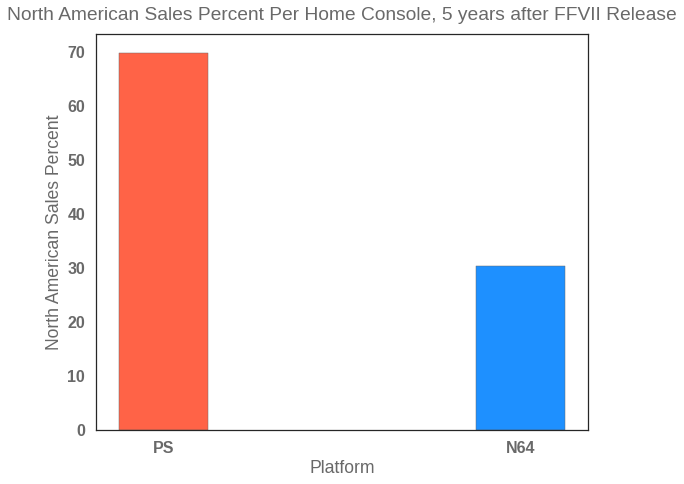

In [128]:
fig, ax = plt.subplots(figsize=(8,7))

colors = ['tomato','dodgerblue','dodgerblue']

ax.bar(platforms_1997_totals_pd['Platform'],y_axis,width=.25,color=colors,edgecolor='dimgray')

ax.grid(False)
ax.set_ylabel('North American Sales Percent')
ax.set_xlabel('Platform')
ax.set_title('North American Sales Percent Per Home Console, 5 years after FFVII Release')
#plt.xticks(rotation='45')
plt.tight_layout()
#plt.show()
plt.savefig('../graphs/1997_platform_sales',transparent=True)

In [138]:
#Gen 5 Platform Percent of Sales Per Platform, Per Year

#REMOVE FFVII from dataset

#Find total sales per year of release
plat_genre_sales_sub = spark.sql("SELECT \
                            COUNT(Name) AS Sum_Total_Per_Year,Year_of_Release,\
                            SUM(NA_players) AS NA_players_total,\
                            SUM(JP_players) AS JP_players_total,\
                            SUM(Other_players) AS Other_players_total,\
                            SUM(Global_players) AS Global_players_total\
                            FROM vg_full_df\
                            WHERE Year_of_Release BETWEEN 1987 AND 2007 \
                                AND (Name NOT LIKE 'Final Fantasy VII' OR Name NOT LIKE 'Final Fantasy VII %')\
                                AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX')\
                            GROUP BY Year_of_Release\
                            ORDER BY Year_of_Release")

#Transfer to table
plat_genre_sales_sub.createOrReplaceTempView("sum_total_games_genre_tab")

test_a = spark.sql("SELECT * FROM sum_total_games_genre_tab")
#test_a.show()

#Total games per platform, year
genre_plat_sales = spark.sql("SELECT \
                                 Platform,COUNT(Name) as Total_Games_On_Platform, Year_of_Release,\
                                 SUM(NA_players) as NA_Total_Sales, \
                                 SUM(JP_players) as JP_Total_Sales, \
                                 SUM(Other_players) as Other_Total_Sales, \
                                 SUM(Global_players) as Global_Total_Sales \
                                 FROM vg_full_df \
                                 WHERE Year_of_Release BETWEEN 1987 AND 2007 \
                                    AND (Name NOT LIKE 'Final Fantasy VII' OR Name NOT LIKE 'Final Fantasy VII %')\
                                    AND (Platform LIKE 'PS' OR Platform LIKE 'SAT' OR Platform LIKE 'N64' OR Platform LIKE '3DO' OR Platform LIKE 'PCFX') \
                                 GROUP BY Platform,Year_of_Release \
                                 ORDER BY Year_of_Release")




#Transfer to table
genre_plat_sales.createOrReplaceTempView("genre_plat_sales_tab")

test_b = spark.sql("SELECT * FROM genre_plat_sales_tab")
#test_b.show()

#filter total games per genre, year, find sales percentages
plat_sales_pre_ffvii = spark.sql("SELECT \
                             SUM(genre_plat_sales_tab.Total_Games_On_Platform) as Total_Games_On_Platform,\
                             \
                             genre_plat_sales_tab.Platform,\
                             ROUND(SUM(genre_plat_sales_tab.NA_Total_Sales)/SUM(sum_total_games_genre_tab.NA_players_total),2) AS NA_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.JP_Total_Sales)/SUM(sum_total_games_genre_tab.JP_players_total),2) AS JP_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.Other_Total_Sales)/SUM(sum_total_games_genre_tab.Other_players_total),2) AS Other_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.Global_Total_Sales)/SUM(sum_total_games_genre_tab.Global_players_total),2) AS Global_Sales_Percent\
                             FROM genre_plat_sales_tab \
                                    LEFT JOIN \
                                    sum_total_games_genre_tab\
                                    ON genre_plat_sales_tab.Year_of_Release = sum_total_games_genre_tab.Year_of_Release \
                             WHERE genre_plat_sales_tab.Year_of_Release BETWEEN 1992 AND 1996\
                             GROUP BY genre_plat_sales_tab.Platform\
                             ORDER BY SUM(genre_plat_sales_tab.NA_Total_Sales)/SUM(sum_total_games_genre_tab.NA_players_total) DESC LIMIT 2")

#Turn to pandas dfs
plat_sales_pre_ffvii_pd = plat_sales_pre_ffvii.toPandas()
#gen_5_genre_sales_per_pre_ffvii_pd


#filter total games per genre, year, find sales percentages
plat_sales_post_ffvii = spark.sql("SELECT \
                             SUM(genre_plat_sales_tab.Total_Games_On_Platform) as Total_Games_On_Platform_of_Genre,\
                             \
                             genre_plat_sales_tab.Platform,\
                             ROUND(SUM(genre_plat_sales_tab.NA_Total_Sales)/SUM(sum_total_games_genre_tab.NA_players_total),2) AS NA_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.JP_Total_Sales)/SUM(sum_total_games_genre_tab.JP_players_total),2)AS JP_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.Other_Total_Sales)/SUM(sum_total_games_genre_tab.Other_players_total),2) AS Other_Sales_Percent, \
                             ROUND(SUM(genre_plat_sales_tab.Global_Total_Sales)/SUM(sum_total_games_genre_tab.Global_players_total),2) AS Global_Sales_Percent\
                             FROM genre_plat_sales_tab \
                                    LEFT JOIN \
                                    sum_total_games_genre_tab\
                                    ON genre_plat_sales_tab.Year_of_Release = sum_total_games_genre_tab.Year_of_Release \
                             WHERE genre_plat_sales_tab.Year_of_Release BETWEEN 1997 AND 2002\
                             GROUP BY genre_plat_sales_tab.Platform\
                             ORDER BY SUM(genre_plat_sales_tab.NA_Total_Sales)/SUM(sum_total_games_genre_tab.NA_players_total) DESC LIMIT 2")



#Turn to pandas dfs
plat_sales_post_ffvii_pd = plat_sales_post_ffvii.toPandas()

#gen_5_genre_sales_per_pre_ffvii.show()
plat_sales_post_ffvii.show()

#split up by platform

#sum(genre_sales_per_post_ffvii_pd['Global_Sales_Percent'])
len(plat_sales_post_ffvii_pd['Platform'])

+--------------------------------+--------+----------------+----------------+-------------------+--------------------+
|Total_Games_On_Platform_of_Genre|Platform|NA_Sales_Percent|JP_Sales_Percent|Other_Sales_Percent|Global_Sales_Percent|
+--------------------------------+--------+----------------+----------------+-------------------+--------------------+
|                             907|      PS|             0.7|            0.74|                0.9|                0.75|
|                             298|     N64|             0.3|            0.19|                0.1|                0.23|
+--------------------------------+--------+----------------+----------------+-------------------+--------------------+



2

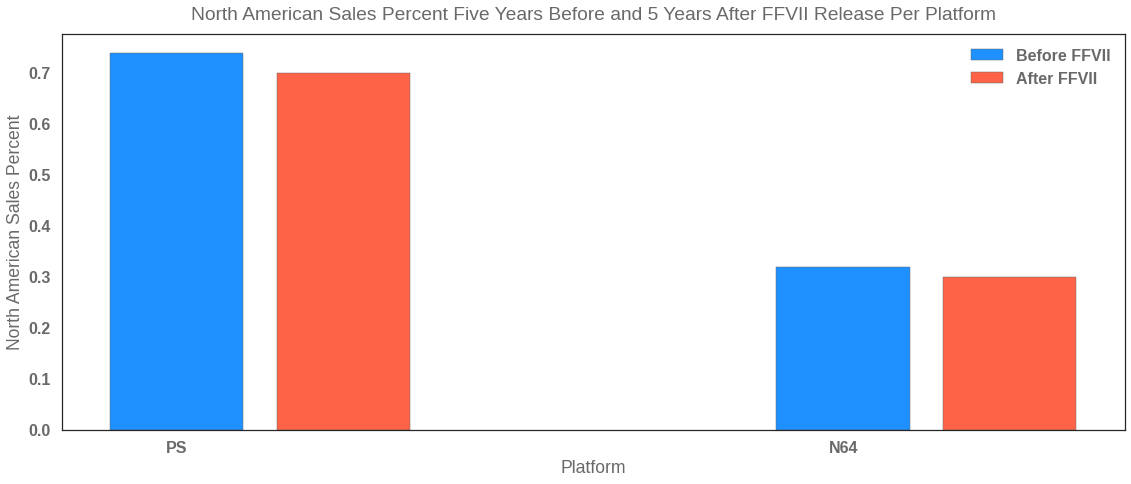

In [139]:
fig, ax = plt.subplots(figsize=(16,7))

platforms = ['PS','N64','SAT']
x_axis = np.arange(len(plat_sales_post_ffvii_pd['Platform']))

y_col_global = 'Global_Sales_Percent'
y_col_na = 'NA_Sales_Percent'
y_col_jp = 'JP_Sales_Percent'
y_col_oth = 'Other_Sales_Percent'

ax.bar(plat_sales_post_ffvii_pd['Platform'],plat_sales_pre_ffvii_pd[y_col_na],width=.2,align='center',label='Before FFVII',color='dodgerblue',edgecolor='dimgray')
ax.bar(x_axis+0.25,plat_sales_post_ffvii_pd[y_col_na],width=.2,align='center',label='After FFVII',color='tomato',edgecolor='dimgray')

ax.grid(False)
ax.set_ylabel('North American Sales Percent')
ax.set_xlabel('Platform')
ax.set_title('North American Sales Percent Five Years Before and 5 Years After FFVII Release Per Platform')
plt.xticks(plat_sales_post_ffvii_pd['Platform'])
plt.legend()

#ax.autoscale(tight=True)
plt.tight_layout()
#plt.show()
plt.savefig('../graphs/na_sales_platform_percent',transparent=True)